In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder, StandardScaler
from pycaret.classification import setup
from pycaret.classification import compare_models, tune_model, create_model, plot_model, predict_model
%matplotlib inline

In [22]:
df_train = pd.read_csv('train_Df64byy.csv')
df_train['type'] = 'train'
df_test = pd.read_csv('test_YCcRUnU.csv')
df_test['type'] = 'test'
df = pd.concat([df_train, df_test], axis = 0)
df.head(10)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,type
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0.0,train
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0.0,train
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1.0,train
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0.0,train
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0,train
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1.0,train
6,7,C3,679,Owned,Individual,28,28,No,NaN,NaN,NaN,17,10640.0,0.0,train
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9.0,4.0,17,29344.0,1.0,train
8,9,C15,3497,Owned,Joint,52,43,No,X1,14.0,3.0,1,27283.2,0.0,train
9,10,C1,530,Owned,Joint,59,26,Yes,NaN,7.0,4.0,18,21100.8,1.0,train


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72687 entries, 0 to 21804
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       72687 non-null  int64  
 1   City_Code                72687 non-null  object 
 2   Region_Code              72687 non-null  int64  
 3   Accomodation_Type        72687 non-null  object 
 4   Reco_Insurance_Type      72687 non-null  object 
 5   Upper_Age                72687 non-null  int64  
 6   Lower_Age                72687 non-null  int64  
 7   Is_Spouse                72687 non-null  object 
 8   Health Indicator         55969 non-null  object 
 9   Holding_Policy_Duration  43833 non-null  object 
 10  Holding_Policy_Type      43833 non-null  float64
 11  Reco_Policy_Cat          72687 non-null  int64  
 12  Reco_Policy_Premium      72687 non-null  float64
 13  Response                 50882 non-null  float64
 14  type                  

In [148]:
df[df['Region_Code'] == 864]

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,type
308,309,C2,864,Owned,Individual,75,75,No,X4,3.0,3.0,14,23076.0,0.0,train
516,517,C2,864,Owned,Individual,36,36,No,X0,5.0,3.0,18,9800.0,0.0,train
2556,2557,C2,864,Owned,Individual,74,74,No,X1,8.0,3.0,14,19328.0,0.0,train
7631,7632,C2,864,Rented,Individual,24,24,No,X1,1.0,3.0,14,9730.0,0.0,train
7878,7879,C2,864,Rented,Individual,60,60,No,X3,14+,3.0,11,17264.0,0.0,train
11593,11594,C2,864,Rented,Individual,40,40,No,X4,9.0,1.0,16,15598.0,0.0,train
18923,18924,C2,864,Rented,Individual,37,37,No,X1,0,0.0,14,7800.0,0.0,train
20719,20720,C2,864,Rented,Individual,47,47,No,X3,4.0,1.0,14,11488.0,0.0,train
26832,26833,C2,864,Owned,Individual,63,63,No,X0,0,0.0,22,19020.0,1.0,train
30599,30600,C2,864,Owned,Individual,46,46,No,X0,0,0.0,22,11376.0,0.0,train


In [24]:
cols = df.columns
for i in cols:
    print(i, 'has', df[i].nunique(), 'unique values')

ID has 72687 unique values
City_Code has 36 unique values
Region_Code has 5538 unique values
Accomodation_Type has 2 unique values
Reco_Insurance_Type has 2 unique values
Upper_Age has 58 unique values
Lower_Age has 60 unique values
Is_Spouse has 2 unique values
Health Indicator has 9 unique values
Holding_Policy_Duration has 15 unique values
Holding_Policy_Type has 4 unique values
Reco_Policy_Cat has 22 unique values
Reco_Policy_Premium has 7685 unique values
Response has 2 unique values
type has 2 unique values


In [25]:
for i in df.columns:
    print('Value Counts for', i)
    print(df[i].value_counts())

Value Counts for ID
2047     1
661      1
53903    1
10896    1
8849     1
        ..
17762    1
23905    1
21856    1
68939    1
2049     1
Name: ID, Length: 72687, dtype: int64
Value Counts for City_Code
C1     12762
C2     11078
C3      6954
C4      5230
C9      3089
C6      2769
C7      2698
C8      2579
C10     2291
C5      1963
C17     1689
C15     1663
C11     1661
C16     1613
C13     1429
C20     1370
C12     1310
C19     1264
C18     1131
C14     1089
C21      984
C23      842
C24      823
C26      731
C22      713
C25      536
C29      533
C27      437
C28      394
C33      392
C32      240
C34      189
C35       89
C30       81
C36       54
C31       17
Name: City_Code, dtype: int64
Value Counts for Region_Code
1       140
2       112
5       105
6       102
4       102
       ... 
5619      1
5631      1
5615      1
5740      1
5750      1
Name: Region_Code, Length: 5538, dtype: int64
Value Counts for Accomodation_Type
Owned     40041
Rented    32646
Name: Accomodation_Typ

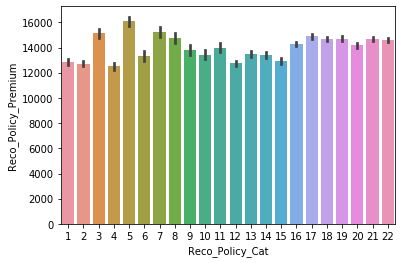

In [26]:
sns.barplot(x = 'Reco_Policy_Cat', y = 'Reco_Policy_Premium', data = df)

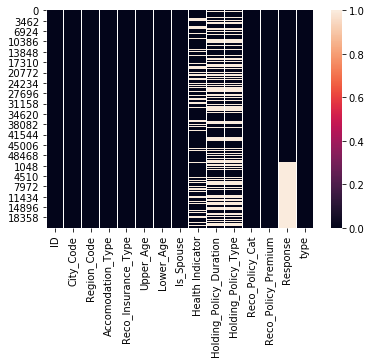

In [27]:
sns.heatmap(df.isnull())

In [28]:
hh = df['Health Indicator'].unique()
for i in hh:
    print('Value Counts for', i)
    print(df[df['Health Indicator'] == i]['Response'].value_counts())

Value Counts for X1
0.0    9834
1.0    3176
Name: Response, dtype: int64
Value Counts for X2
0.0    7841
1.0    2491
Name: Response, dtype: int64
Value Counts for nan
Series([], Name: Response, dtype: int64)
Value Counts for X4
0.0    4347
1.0    1396
Name: Response, dtype: int64
Value Counts for X3
0.0    5163
1.0    1599
Name: Response, dtype: int64
Value Counts for X6
0.0    973
1.0    307
Name: Response, dtype: int64
Value Counts for X5
0.0    1319
1.0     408
Name: Response, dtype: int64
Value Counts for X8
0.0    60
1.0    18
Name: Response, dtype: int64
Value Counts for X7
0.0    134
1.0     62
Name: Response, dtype: int64
Value Counts for X9
0.0    49
1.0    14
Name: Response, dtype: int64


In [29]:
ll = ['X8', 'X7', 'X9']
for i in ll:
    print(len(df[df['Health Indicator'] == i]))

119
292
91


# Handling Missing Vars

In [30]:
df['Holding_Policy_Duration'].fillna('0', inplace = True)
# sns.heatmap(df.isnull())

In [31]:
df['Holding_Policy_Type'].fillna(0.0, inplace = True)

In [32]:
# Imputing health indicator to X1, we will check later
df['Health Indicator'].fillna('X0', inplace = True)

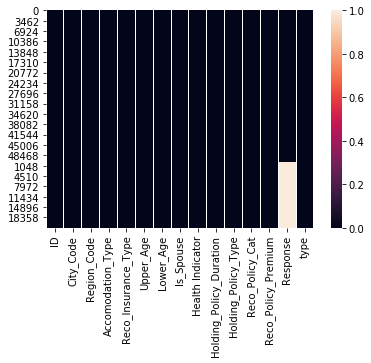

In [33]:
sns.heatmap(df.isnull())

# One-Hot Encoding cat vars

In [34]:
# dummies = pd.get_dummies(data = df, columns = ['Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Holding_Policy_Type'])
dummies = pd.get_dummies(data = df, columns = ['Accomodation_Type', 'Reco_Insurance_Type'], drop_first = True)
dummies

,ID,City_Code,Region_Code,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,type,Accomodation_Type_Rented,Reco_Insurance_Type_Joint
0,1,C3,3213,36,36,No,X1,14+,3.0,22,11628.0,0.0,train,1,0
1,2,C5,1117,75,22,No,X2,0,0.0,22,30510.0,0.0,train,0,1
2,3,C5,3732,32,32,No,X0,1.0,1.0,19,7450.0,1.0,train,0,0
3,4,C24,4378,52,48,No,X1,14+,3.0,19,17780.0,0.0,train,0,1
4,5,C8,2190,44,44,No,X2,3.0,1.0,16,10404.0,0.0,train,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,C3,1044,45,45,No,X1,4.0,1.0,18,15884.0,NaN,test,0,0
21801,72684,C4,266,59,59,No,X5,6.0,3.0,18,21390.0,NaN,test,0,0
21802,72685,C12,2470,74,74,No,X3,0,0.0,1,17836.0,NaN,test,0,0
21803,72686,C10,1676,25,25,No,X4,3.0,1.0,19,11568.0,NaN,test,1,0


# Merging Upper and Lower Age

In [35]:
dummies['Age'] = (dummies['Upper_Age'] + dummies['Lower_Age'])/2
dummies.drop(['Upper_Age', 'Lower_Age'], axis = 1, inplace = True)
dummies

,ID,City_Code,Region_Code,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,type,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Age
0,1,C3,3213,No,X1,14+,3.0,22,11628.0,0.0,train,1,0,36.0
1,2,C5,1117,No,X2,0,0.0,22,30510.0,0.0,train,0,1,48.5
2,3,C5,3732,No,X0,1.0,1.0,19,7450.0,1.0,train,0,0,32.0
3,4,C24,4378,No,X1,14+,3.0,19,17780.0,0.0,train,0,1,50.0
4,5,C8,2190,No,X2,3.0,1.0,16,10404.0,0.0,train,1,0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,C3,1044,No,X1,4.0,1.0,18,15884.0,NaN,test,0,0,45.0
21801,72684,C4,266,No,X5,6.0,3.0,18,21390.0,NaN,test,0,0,59.0
21802,72685,C12,2470,No,X3,0,0.0,1,17836.0,NaN,test,0,0,74.0
21803,72686,C10,1676,No,X4,3.0,1.0,19,11568.0,NaN,test,1,0,25.0


# Changing Holding_Policy_Value 14+ to 15 and converting the column into int

In [36]:
dummies['Holding_Policy_Duration'] = dummies['Holding_Policy_Duration'].apply(lambda x: 15 if x == '14+' else float(x))
dummies['Holding_Policy_Duration'] = dummies['Holding_Policy_Duration'].apply(lambda x: float(x))

In [37]:
dummies.dtypes

ID                             int64
City_Code                     object
Region_Code                    int64
Is_Spouse                     object
Health Indicator              object
Holding_Policy_Duration      float64
Holding_Policy_Type          float64
Reco_Policy_Cat                int64
Reco_Policy_Premium          float64
Response                     float64
type                          object
Accomodation_Type_Rented       uint8
Reco_Insurance_Type_Joint      uint8
Age                          float64
dtype: object

# Converting Is_Spouse to numerical

In [38]:
dummies['Is_Spouse'] = dummies['Is_Spouse'].map({'No': 0, 'Yes': 1})
dummies

,ID,City_Code,Region_Code,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,type,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Age
0,1,C3,3213,0,X1,15.0,3.0,22,11628.0,0.0,train,1,0,36.0
1,2,C5,1117,0,X2,0.0,0.0,22,30510.0,0.0,train,0,1,48.5
2,3,C5,3732,0,X0,1.0,1.0,19,7450.0,1.0,train,0,0,32.0
3,4,C24,4378,0,X1,15.0,3.0,19,17780.0,0.0,train,0,1,50.0
4,5,C8,2190,0,X2,3.0,1.0,16,10404.0,0.0,train,1,0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,C3,1044,0,X1,4.0,1.0,18,15884.0,NaN,test,0,0,45.0
21801,72684,C4,266,0,X5,6.0,3.0,18,21390.0,NaN,test,0,0,59.0
21802,72685,C12,2470,0,X3,0.0,0.0,1,17836.0,NaN,test,0,0,74.0
21803,72686,C10,1676,0,X4,3.0,1.0,19,11568.0,NaN,test,1,0,25.0


# Converting Health Indicator using One-Hot Encoder

In [39]:
from sklearn.preprocessing import LabelEncoder

In [41]:
lbl = LabelEncoder()
health = lbl.fit_transform(dummies['Health Indicator'])
dummies['Health Indicator'] = health
data = dummies

In [42]:
data

,ID,City_Code,Region_Code,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,type,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Age
0,1,C3,3213,0,1,15.0,3.0,22,11628.0,0.0,train,1,0,36.0
1,2,C5,1117,0,2,0.0,0.0,22,30510.0,0.0,train,0,1,48.5
2,3,C5,3732,0,0,1.0,1.0,19,7450.0,1.0,train,0,0,32.0
3,4,C24,4378,0,1,15.0,3.0,19,17780.0,0.0,train,0,1,50.0
4,5,C8,2190,0,2,3.0,1.0,16,10404.0,0.0,train,1,0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,C3,1044,0,1,4.0,1.0,18,15884.0,NaN,test,0,0,45.0
21801,72684,C4,266,0,5,6.0,3.0,18,21390.0,NaN,test,0,0,59.0
21802,72685,C12,2470,0,3,0.0,0.0,1,17836.0,NaN,test,0,0,74.0
21803,72686,C10,1676,0,4,3.0,1.0,19,11568.0,NaN,test,1,0,25.0


In [20]:
# dummies = pd.get_dummies(dummies, columns = ['Health Indicator'])
# dummies

,ID,City_Code,Region_Code,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,type,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Age,Health Indicator_X0,Health Indicator_X1,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9
0,1,C3,3213,0,15.0,3.0,22,11628.0,0.0,train,1,0,36.0,0,1,0,0,0,0,0,0,0,0
1,2,C5,1117,0,0.0,0.0,22,30510.0,0.0,train,0,1,48.5,0,0,1,0,0,0,0,0,0,0
2,3,C5,3732,0,1.0,1.0,19,7450.0,1.0,train,0,0,32.0,1,0,0,0,0,0,0,0,0,0
3,4,C24,4378,0,15.0,3.0,19,17780.0,0.0,train,0,1,50.0,0,1,0,0,0,0,0,0,0,0
4,5,C8,2190,0,3.0,1.0,16,10404.0,0.0,train,1,0,44.0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,C3,1044,0,4.0,1.0,18,15884.0,NaN,test,0,0,45.0,0,1,0,0,0,0,0,0,0,0
21801,72684,C4,266,0,6.0,3.0,18,21390.0,NaN,test,0,0,59.0,0,0,0,0,0,1,0,0,0,0
21802,72685,C12,2470,0,0.0,0.0,1,17836.0,NaN,test,0,0,74.0,0,0,0,1,0,0,0,0,0,0
21803,72686,C10,1676,0,3.0,1.0,19,11568.0,NaN,test,1,0,25.0,0,0,0,0,1,0,0,0,0,0


In [21]:
dummies.dtypes

ID                             int64
City_Code                     object
Region_Code                    int64
Is_Spouse                      int64
Holding_Policy_Duration      float64
Holding_Policy_Type          float64
Reco_Policy_Cat                int64
Reco_Policy_Premium          float64
Response                     float64
type                          object
Accomodation_Type_Rented       uint8
Reco_Insurance_Type_Joint      uint8
Age                          float64
Health Indicator_X0            uint8
Health Indicator_X1            uint8
Health Indicator_X2            uint8
Health Indicator_X3            uint8
Health Indicator_X4            uint8
Health Indicator_X5            uint8
Health Indicator_X6            uint8
Health Indicator_X7            uint8
Health Indicator_X8            uint8
Health Indicator_X9            uint8
dtype: object

In [22]:
df['City_Code'].value_counts()

C1     12762
C2     11078
C3      6954
C4      5230
C9      3089
C6      2769
C7      2698
C8      2579
C10     2291
C5      1963
C17     1689
C15     1663
C11     1661
C16     1613
C13     1429
C20     1370
C12     1310
C19     1264
C18     1131
C14     1089
C21      984
C23      842
C24      823
C26      731
C22      713
C25      536
C29      533
C27      437
C28      394
C33      392
C32      240
C34      189
C35       89
C30       81
C36       54
C31       17
Name: City_Code, dtype: int64

# Using HASH Encoder for City Code 

In [43]:
lbl2 = LabelEncoder()
city = lbl2.fit_transform(dummies['City_Code'])
dummies['City_Code'] = city
data = dummies

In [24]:
# hash_encoder = ce.HashingEncoder(cols = ['City_Code'], drop_invariant=True)
# data = hash_encoder.fit_transform(dummies)
# data

In [44]:
data.dtypes

ID                             int64
City_Code                      int32
Region_Code                    int64
Is_Spouse                      int64
Health Indicator               int32
Holding_Policy_Duration      float64
Holding_Policy_Type          float64
Reco_Policy_Cat                int64
Reco_Policy_Premium          float64
Response                     float64
type                          object
Accomodation_Type_Rented       uint8
Reco_Insurance_Type_Joint      uint8
Age                          float64
dtype: object

# Separating train and test data

In [46]:
train_set = data[data['type'] == 'train']
train_set.drop(['type', 'ID'], axis = 1, inplace = True)
test_set = data[data['type'] == 'test']
test_set.drop(['type', 'ID'], axis = 1, inplace = True)

In [47]:
len(train_set), len(test_set)

(50882, 21805)

In [48]:
train_set.dtypes

City_Code                      int32
Region_Code                    int64
Is_Spouse                      int64
Health Indicator               int32
Holding_Policy_Duration      float64
Holding_Policy_Type          float64
Reco_Policy_Cat                int64
Reco_Policy_Premium          float64
Response                     float64
Accomodation_Type_Rented       uint8
Reco_Insurance_Type_Joint      uint8
Age                          float64
dtype: object

In [30]:
type(train_set[['Response']])

pandas.core.frame.DataFrame

In [52]:
stdsclr = StandardScaler()

In [54]:
train_scaled1 = stdsclr.fit_transform(train_set)
train_scaled1

array([[ 0.57831877,  1.03942484, -0.44536658, ...,  1.10404602,
        -0.50520285, -0.45946509],
       [ 1.31922341, -0.43241534, -0.44536658, ..., -0.90575934,
         1.97940293,  0.27708655],
       [ 1.31922341,  1.40387381, -0.44536658, ..., -0.90575934,
        -0.50520285, -0.69516162],
       ...,
       [-1.23278146, -0.90640968, -0.44536658, ...,  1.10404602,
        -0.50520285,  1.13148646],
       [-1.23278146, -1.21397933, -0.44536658, ..., -0.90575934,
         1.97940293,  0.95471407],
       [ 0.57831877,  1.49797047, -0.44536658, ...,  1.10404602,
        -0.50520285, -1.16655467]])

In [81]:
train_dff1 = pd.DataFrame(train_scaled1, columns = train_set.columns, index = None)

In [56]:
train1 = train_set.drop('Response', axis = 1)
stdsclr1 = StandardScaler()
train_s = stdsclr1.fit_transform(train1)

In [73]:
train_dff = pd.DataFrame(train_s, columns = train1.columns, index = None)

In [80]:
resp = train_set['Response'].values
train_dff['Response'] = resp
train_dff

,City_Code,Region_Code,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Age,Response
0,0.578319,1.039425,-0.445367,-0.540827,2.369619,1.067324,1.085830,-0.387852,1.104046,-0.505203,-0.459465,0.0
1,1.319223,-0.432415,-0.445367,0.071672,-0.777670,-1.023305,1.085830,2.477394,-0.905759,1.979403,0.277087,0.0
2,1.319223,1.403874,-0.445367,-1.153326,-0.567851,-0.326429,0.612688,-1.021842,-0.905759,-0.505203,-0.695162,1.0
3,0.084382,1.857504,-0.445367,-0.540827,2.369619,1.067324,0.612688,0.545682,-0.905759,1.979403,0.365473,0.0
4,1.566192,0.321060,-0.445367,0.071672,-0.148212,-0.326429,0.139547,-0.573588,1.104046,-0.505203,0.011928,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
50877,1.236901,-0.623418,-0.445367,0.684171,-0.777670,-1.023305,0.454975,-0.983299,1.104046,-0.505203,-1.284403,0.0
50878,1.319223,1.724083,-0.445367,0.684171,0.691065,1.067324,-1.753018,-1.331705,1.104046,-0.505203,-0.989782,0.0
50879,-1.232781,-0.906410,-0.445367,0.071672,2.369619,-0.326429,-0.491308,-0.426395,1.104046,-0.505203,1.131486,0.0
50880,-1.232781,-1.213979,-0.445367,0.071672,-0.358031,0.370448,0.139547,2.123707,-0.905759,1.979403,0.954714,1.0


# Scaling test set

In [111]:
test = test_set.drop(['Response'], axis = 1)
stdsclr1 = StandardScaler()
test_scaled = stdsclr1.fit_transform(test)
test_dff = pd.DataFrame(test_scaled, columns = test.columns, index = None)

# Building Model

In [100]:
# Using City and Region Code
X = train_set.drop(['Response'], axis = 1)
y = train_set['Response']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

In [114]:
import xgboost as xgb
model = xgb.XGBClassifier(random_state=101,learning_rate=0.01)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.7577871671415938

In [115]:
len(model.feature_importances_)

9

In [35]:
model.feature_importances_

array([6.1392546e-02, 4.2897724e-02, 2.3577308e-02, 6.7210436e-02,
       8.5637301e-02, 4.2513752e-01, 1.8932039e-02, 5.9186634e-02,
       1.0271736e-02, 2.7991064e-02, 2.6937490e-02, 1.2640890e-02,
       3.6305636e-02, 1.4805166e-02, 2.6820133e-02, 2.1931890e-02,
       9.8896576e-03, 2.8286926e-02, 1.4797793e-04, 0.0000000e+00],
      dtype=float32)

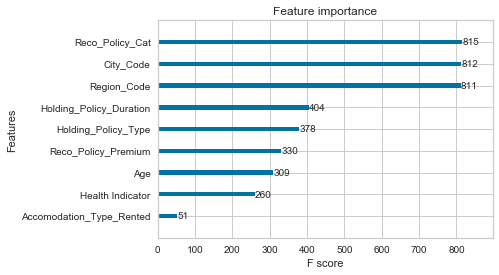

In [116]:
xgb.plot_importance(model)

In [121]:
pred_probs = model.predict_proba(X_test)
preds = model.predict(X_test)
confusion_matrix(y_test, preds)

array([[7706,    5],
       [2460,    6]], dtype=int64)

In [144]:
y_preds = []
for i in pred_probs:
    if i[0] > 0.8:
        y_preds.append(0)
    else:
        y_preds.append(1)

In [145]:
confusion_matrix(y_test, y_preds)

array([[ 395, 7316],
       [   3, 2463]], dtype=int64)

In [137]:
# test_dff = test_dff.drop(['Is_Spouse', 'Reco_Insurance_Type_Joint'], axis = 1)
test_pred_prob = model.predict_proba(test_dff)
test_pred_prob

array([[0.8140676 , 0.18593238],
       [0.8140676 , 0.18593238],
       [0.8140676 , 0.18593238],
       ...,
       [0.8140676 , 0.18593238],
       [0.8140676 , 0.18593238],
       [0.8140676 , 0.18593238]], dtype=float32)

In [ ]:
predictions = model.xgb_proba(scalaer)

In [140]:
y_preds = []
for i in test_pred_prob:
    if i[0] > 0.55:
        y_preds.append(0)
    else:
        y_preds.append(1)

In [141]:
y_preds

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


# PyCaret

In [122]:
grid = setup(data = train_dff, target = 'Response', fix_imbalance=True)

,Description,Value
0,session_id,4684
1,Target,Response
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(50882, 12)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [123]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7590,0.6592,0.0459,0.4463,0.0832,0.0405,0.0772,0.7660
xgboost,Extreme Gradient Boosting,0.7555,0.6555,0.0940,0.4404,0.1547,0.0773,0.1095,3.3900
gbc,Gradient Boosting Classifier,0.7480,0.6216,0.1157,0.4010,0.1793,0.0813,0.1035,4.4420
rf,Random Forest Classifier,0.7378,0.6201,0.1211,0.3541,0.1804,0.0670,0.0808,6.6100
et,Extra Trees Classifier,0.7293,0.6058,0.1285,0.3271,0.1845,0.0579,0.0670,4.2870
dt,Decision Tree Classifier,0.6663,0.5583,0.3519,0.3187,0.3344,0.1125,0.1128,0.5620
ada,Ada Boost Classifier,0.6003,0.5839,0.4418,0.2831,0.3450,0.0769,0.0809,1.6470
knn,K Neighbors Classifier,0.5489,0.5304,0.4715,0.2568,0.3325,0.0347,0.0383,1.2400
lr,Logistic Regression,0.4774,0.5634,0.6510,0.2609,0.3726,0.0490,0.0644,1.9690
lda,Linear Discriminant Analysis,0.4765,0.5634,0.6554,0.2614,0.3737,0.0500,0.0659,0.4030


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4684, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [125]:
lgbm = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7572,0.6726,0.1060,0.4592,0.1722,0.0910,0.1251
1,0.7513,0.6338,0.0883,0.4011,0.1448,0.0643,0.0899
2,0.7535,0.6658,0.1025,0.4286,0.1654,0.0808,0.1098
3,0.7555,0.6673,0.1060,0.4455,0.1713,0.0877,0.1192
4,0.7555,0.6425,0.1072,0.4461,0.1728,0.0887,0.1202
5,0.7535,0.6518,0.0801,0.4121,0.1341,0.0613,0.0899
6,0.7521,0.6490,0.0836,0.4034,0.1385,0.0617,0.0883
7,0.7504,0.6403,0.0767,0.3801,0.1276,0.0518,0.0749
8,0.7658,0.6728,0.1014,0.5443,0.1710,0.1039,0.1549
9,0.7602,0.6594,0.0883,0.4839,0.1494,0.0818,0.1229


In [126]:
tuned_lightgbm = tune_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4029,0.6634,0.9376,0.2774,0.4281,0.0952,0.1864
1,0.4031,0.6337,0.9211,0.2753,0.4238,0.0898,0.1719
2,0.4026,0.6640,0.9340,0.2768,0.4270,0.0938,0.1829
3,0.3888,0.6675,0.9399,0.2729,0.4230,0.0850,0.1737
4,0.3942,0.6449,0.9352,0.2741,0.4239,0.0875,0.1750
5,0.4096,0.6591,0.9258,0.2781,0.4278,0.0966,0.1830
6,0.4023,0.6463,0.9352,0.2768,0.4272,0.0940,0.1837
7,0.3887,0.6264,0.9116,0.2689,0.4153,0.0751,0.1477
8,0.4024,0.6629,0.9210,0.2748,0.4233,0.0892,0.1712
9,0.4097,0.6532,0.9199,0.2774,0.4263,0.0946,0.1779


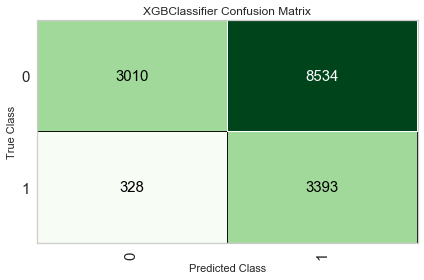

In [127]:
plot_model(estimator=tuned_lightgbm, plot = 'confusion_matrix')

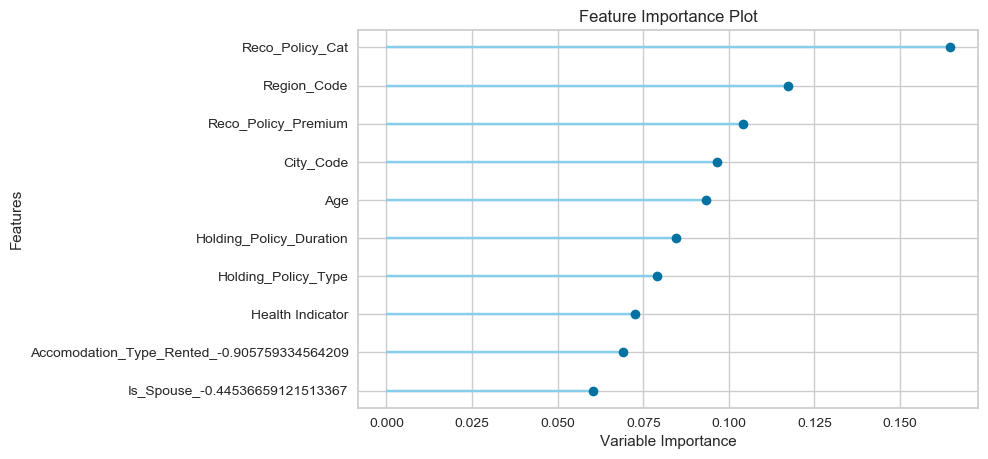

In [91]:
plot_model(estimator=tuned_lightgbm, plot = 'feature')

In [94]:
pr = predict_model(tuned_lightgbm, data = test_dff)

In [97]:
labels = pr['Label'].values
labels

array(['1.0', '1.0', '1.0', ..., '0.0', '1.0', '0.0'], dtype=object)

# Exporting results to Sample

In [98]:
sample = pd.read_csv('sample_submission_QrCyCoT.csv')
sample['Response'] = labels

In [99]:
sample.to_csv('results-feb28.csv', index = False)

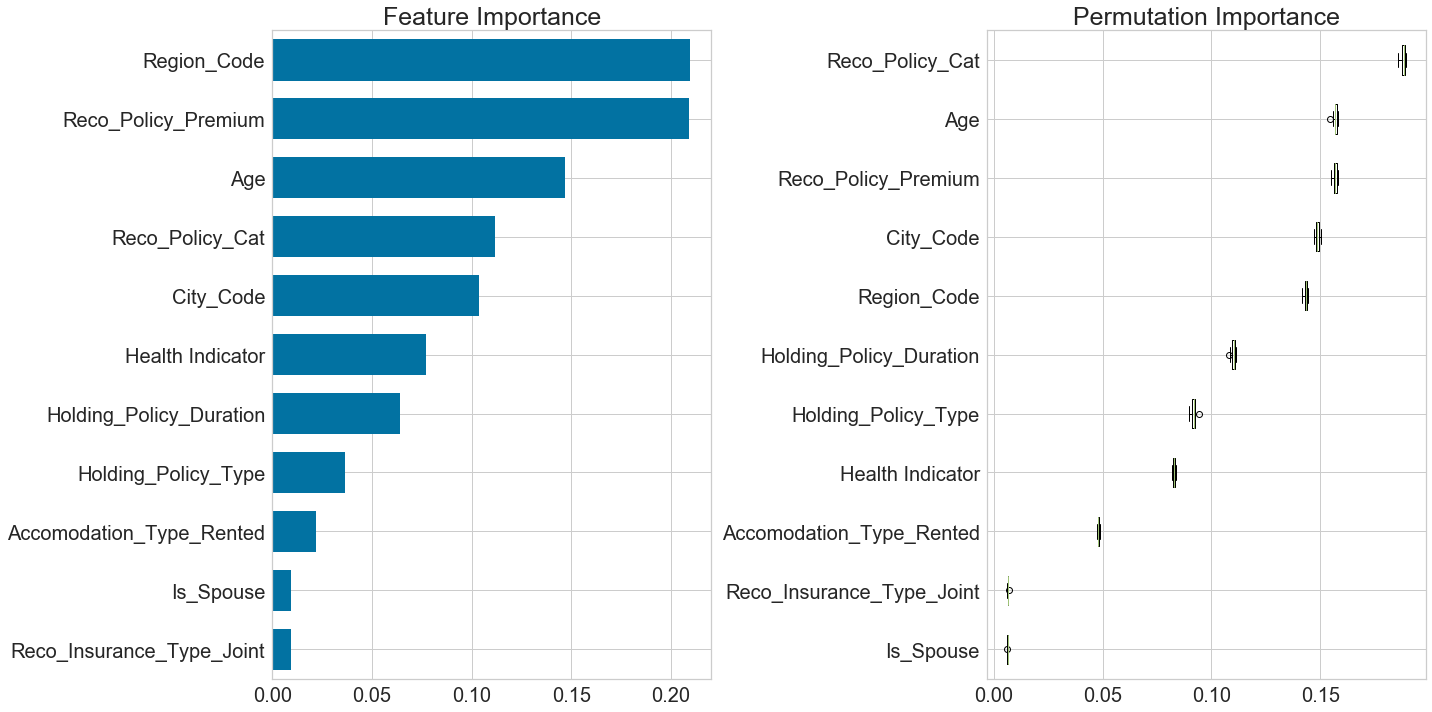

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
%matplotlib inline
import matplotlib.pyplot as plt

clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

result = permutation_importance(clf, X_train, y_train, n_repeats=10, random_state=0)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticklabels(X_train.columns[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(clf.feature_importances_)))
ax1.tick_params(labelsize=20)
ax1.set_title('Feature Importance', fontsize=25)

ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X_train.columns[perm_sorted_idx])
ax2.set_title('Permutation Importance', fontsize=25)
ax2.tick_params(labelsize=20)

fig.tight_layout()
plt.show()

In [104]:
train_set

,City_Code,Region_Code,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Age
0,22,3213,0,1,15.0,3.0,22,11628.0,0.0,1,0,36.0
1,31,1117,0,2,0.0,0.0,22,30510.0,0.0,0,1,48.5
2,31,3732,0,0,1.0,1.0,19,7450.0,1.0,0,0,32.0
3,16,4378,0,1,15.0,3.0,19,17780.0,0.0,0,1,50.0
4,34,2190,0,2,3.0,1.0,16,10404.0,0.0,1,0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...
50877,30,845,0,3,0.0,0.0,18,7704.0,0.0,1,0,22.0
50878,31,4188,0,3,7.0,3.0,4,5408.0,0.0,1,0,27.0
50879,0,442,0,2,15.0,1.0,12,11374.0,0.0,1,0,63.0
50880,0,4,0,2,2.0,2.0,16,28179.2,1.0,0,1,60.0


In [106]:
X = train_set.drop(['Response', 'Reco_Insurance_Type_Joint', 'Is_Spouse'], axis = 1)
y = train_set['Response'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

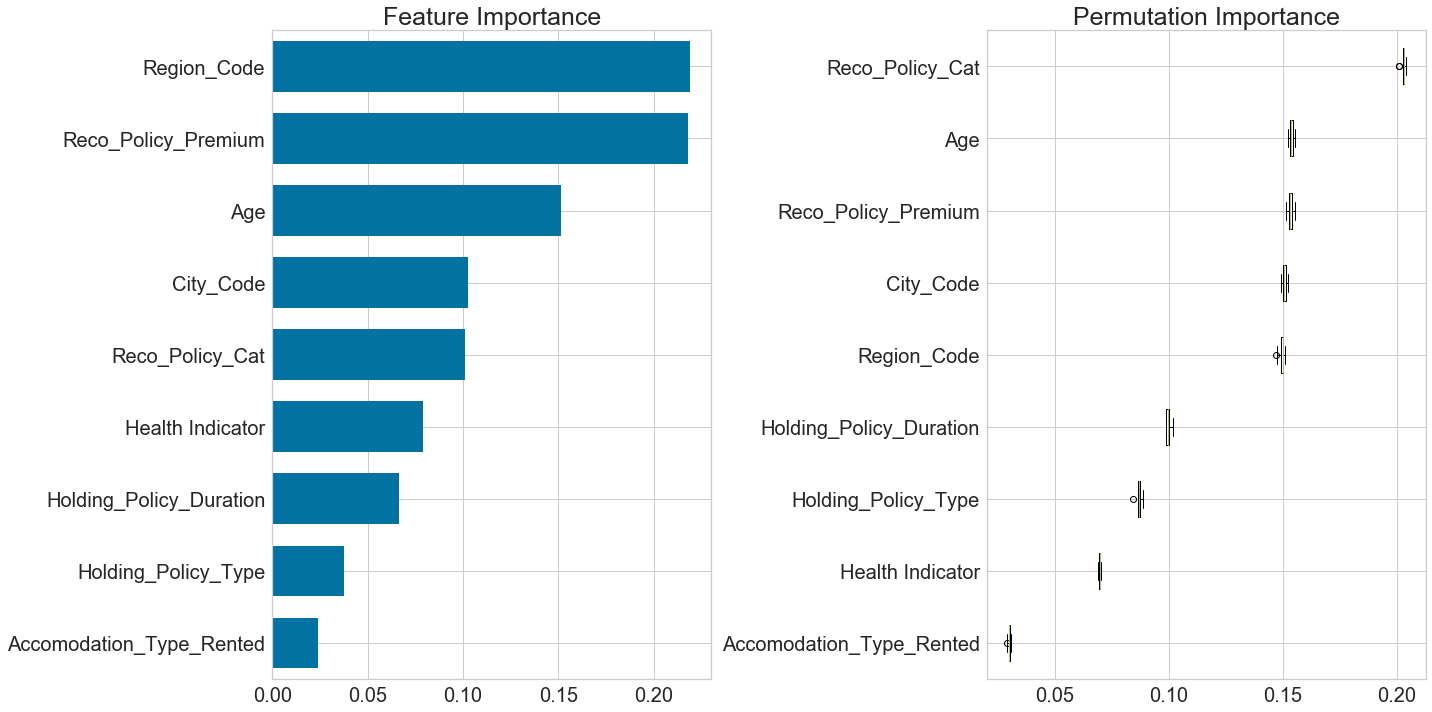

In [107]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

result = permutation_importance(clf, X_train, y_train, n_repeats=10, random_state=0)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticklabels(X_train.columns[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(clf.feature_importances_)))
ax1.tick_params(labelsize=20)
ax1.set_title('Feature Importance', fontsize=25)

ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X_train.columns[perm_sorted_idx])
ax2.set_title('Permutation Importance', fontsize=25)
ax2.tick_params(labelsize=20)

fig.tight_layout()
plt.show()

In [108]:
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[7545,  166],
       [2361,  105]], dtype=int64)

In [109]:
roc_auc_score(y_test, y_pred)

0.5105256938534738

# Modelling using above features from feature importance graph

In [46]:
X = data.drop(['Health Indicator_X4', 'col_3'], axis = 1)
y = data['Response']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [48]:
# Striaght model
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(X_train, y_train)
model.score(X_test,y_test)

[20:16:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


1.0

In [50]:
# Customized model
dt = xgb.DMatrix(X_train.to_numpy(),label=y_train.to_numpy())
dv = xgb.DMatrix(X_test.to_numpy(),label=y_test.to_numpy())
params = {
    "eta": 0.2,
    "max_depth": 4,
    "objective": "binary:logistic",
    "silent": 1,
    "base_score": np.mean(y_train),
    'n_estimators': 1000,
    "eval_metric": "logloss"
}
model = xgb.train(params, dt, 3000, [(dt, "train"),(dv, "valid")], verbose_eval=200)

[20:16:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.37531	valid-logloss:0.37114
[200]	train-logloss:0.00006	valid-logloss:0.00006
[400]	train-logloss:0.00006	valid-logloss:0.00006
[600]	train-logloss:0.00006	valid-logloss:0.00006
[800]	train-logloss:0.00006	valid-logloss:0.00006
[1000]	train-logloss:0.00006	valid-logloss:0.00006
[1200]	train-logloss:0.00006	valid-logloss:0.00006
[1400]	train-logloss:0.00006	valid-logloss:0.00006
[1600]	train-logloss:0.00006	valid-logloss:0.00006
[1800]	train-logloss:0.00006	valid-logloss:0.00006
[2000]	train-logloss:0.00006	valid-logloss:0.00006
[2200]	train-logloss:0.00006	valid-logloss:0.000

# Test Set Preprocessing

In [51]:
test_df = pd.read_csv('test_YCcRUnU.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       21805 non-null  int64  
 1   City_Code                21805 non-null  object 
 2   Region_Code              21805 non-null  int64  
 3   Accomodation_Type        21805 non-null  object 
 4   Reco_Insurance_Type      21805 non-null  object 
 5   Upper_Age                21805 non-null  int64  
 6   Lower_Age                21805 non-null  int64  
 7   Is_Spouse                21805 non-null  object 
 8   Health Indicator         16778 non-null  object 
 9   Holding_Policy_Duration  13202 non-null  object 
 10  Holding_Policy_Type      13202 non-null  float64
 11  Reco_Policy_Cat          21805 non-null  int64  
 12  Reco_Policy_Premium      21805 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 2.2+ MB


In [52]:
test_df['Health Indicator'].fillna('X0', inplace = True)
test_df['Holding_Policy_Duration'].fillna(0.0, inplace = True)
test_df['Holding_Policy_Type'].fillna('0', inplace = True)

In [53]:
test_df['Age'] = (test_df['Upper_Age'] + test_df['Lower_Age'])/2
test_df.drop(['Upper_Age', 'Lower_Age'], axis = 1, inplace = True)

In [ ]:
test_df['Holding_Policy_Duration'] = test_df['Holding_Policy_Duration'].apply(lambda x: 15 if x == '14+' else float(x))
test_df['Holding_Policy_Duration'] = test_df['Holding_Policy_Duration'].apply(lambda x: float(x))

In [ ]:
test_df.info()

In [ ]:
test_df['Is_Spouse'] = test_df['Is_Spouse'].map({'No': 0, 'Yes': 1})

In [ ]:
test_df = pd.get_dummies(test_df, columns = ['Health Indicator'])

In [ ]:
lbl2 = LabelEncoder()
city = lbl2.fit_transform(test_df['City_Code'])
test_df['City_Code'] = city

In [ ]:
test_df = pd.get_dummies(test_df, columns = ['Reco_Insurance_Type'], drop_first = True)

In [ ]:
test_df

In [ ]:
id = test_df.ID
test_df = test_df.drop(['ID'], axis = 1)

In [ ]:
test_df.columns

In [ ]:
test_df = test_df.drop(['Reco_Insurance_Type', 'IS_Spouse'], axis = 1)

# Model Without City and Region Importance

In [ ]:
# Dropping city and region importance
X1 = dummies.drop(['City_Code', 'Region_Code', 'Response', 'ID'], axis = 1)
y1 = dummies['Response']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.20, random_state=46)

In [ ]:
X_train

In [ ]:
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01, use_label_encoder = False)
model.fit(X_train, y_train)
model.score(X_test,y_test)

In [ ]:
xgb.plot_importance(model)

# Customizing the model

In [ ]:
X3 = dummies[['Region_Code', 'City_Code', 'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Holding_Policy_Duration', 'Age', 'Holding_Policy_Type_3.0', 'Health Indicator', 'Holding_Policy_Type_1.0', 'Accomodation_Type_Owned', 'Holding_Policy_Type_4.0']]
y3 = dummies['Response']

In [ ]:
Xt, Xv, yt, yv = train_test_split(X3, y3, test_size = 0.25, random_state = 0)

In [ ]:
dt = xgb.DMatrix(Xt.to_numpy(),label=yt.to_numpy())
dv = xgb.DMatrix(Xv.to_numpy(),label=yv.to_numpy())
params = {
    "eta": 0.2,
    "max_depth": 4,
    "objective": "binary:logistic",
    "silent": 1,
    "base_score": np.mean(yt),
    'n_estimators': 1000,
    "eval_metric": "logloss"
}
model = xgb.train(params, dt, 2000, [(dt, "train"),(dv, "valid")], verbose_eval=200)

In [ ]:
y_pred = model.predict(dv)
y_pred = [round(value) for value in y_pred]
accuracy_score(y_pred, yv)

In [ ]:
xgb.plot_importance(model)

In [ ]:
# city code inclusive
Xt, Xv, yt, yv = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
dt = xgb.DMatrix(Xt.to_numpy(),label=yt.to_numpy())
dv = xgb.DMatrix(Xv.to_numpy(),label=yv.to_numpy())
params = {
    "eta": 0.2,
    "max_depth": 4,
    "objective": "binary:logistic",
    "silent": 1,
    "base_score": np.mean(yt),
    'n_estimators': 1000,
    "eval_metric": "logloss"
}
model = xgb.train(params, dt, 3000, [(dt, "train"),(dv, "valid")], verbose_eval=200)

In [ ]:
y_pred = model.predict(dv)
y_pred

In [ ]:
yv

# Using Voting Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)


voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

In [ ]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))